In [1]:
%load_ext autoreload
%autoreload 2

from Dataset import *
import glob 
import os 
import plotly.express as px

list_of_files = glob.glob('../DATA/*') # * means all if need specific format then *.csv 
latest_file = max(list_of_files, key=os.path.getctime)
latest_smell = max(glob.glob(latest_file+'/*'),key=os.path.getctime)
#latest_smell = '../DATA/subject_0/3.csv'

In [11]:
nb_samples = 100
X,y = create_img_dataset('../DATA',nb_samples)
n = len(X)

In [3]:
exp_day = (np.tile(range(5),(10,1)).T).reshape(-1)
print(exp_day)
print(len(exp_day))
print(n)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4]
50
80


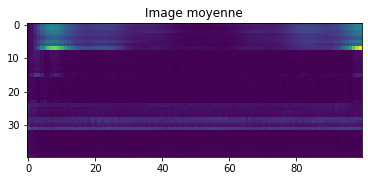

In [4]:
from sklearn.decomposition import PCA


moy = X.mean(axis=0)

X_centre = X - np.tile(moy,(len(X),1))


plt.imshow(moy.reshape(40,nb_samples))
plt.title('Image moyenne')
plt.show()

In [6]:
pca = PCA()
pca.fit(X_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(X_centre)  # computes the projection coefficients

In [7]:
df = pd.DataFrame({
'class':y.astype(str), 'first_compo':proj[:,0].T, 'second_compo':proj[:,1].T, 'third_compo':proj[:,2].T
})

fig = px.scatter(df, x='first_compo', y='second_compo',color="class", symbol='class',
                 marginal_x="box", marginal_y="box",
                    title="2 first components of PCA")
fig.show()

In [8]:
fig = px.scatter_3d(df, x='first_compo', y='second_compo',z='third_compo',color='class',symbol='class',
                    title="3 first components of PCA")
fig.show()

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf = LDA(n_components=3)
proj = clf.fit_transform(X_centre,y)

df = pd.DataFrame({
'class':y.astype(str), 'first_compo':proj[:,0].T, 'second_compo':proj[:,1].T, 'third_compo':proj[:,2].T
})

fig = px.scatter(df, x='first_compo', y='second_compo',color="class", symbol='class',
                 marginal_x="box", marginal_y="box",
                    title="2 first components of FDA")
fig.show()


In [10]:
fig = px.scatter_3d(df, x='first_compo', y='second_compo',z='third_compo',color='class',symbol='class',
                    title="3 first components of FDA")
fig.show()